# Part5: Github Link for IE517 at 2023, HW4

https://github.com/kibae-kim/IE-517-ML-in-Fin-Lab-Section-A/tree/main/IE517_F20_HW4

# Part 1: Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
housing_df = pd.read_csv('housing_without_noise.csv')

In [4]:
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

## Correlation Matrix

- Correlation between features of real estate and economic status
- Real Estate: 'RM', 'ZN', 'MEDV'
- Economic Status: 'LSTAT'

In [6]:
real_estate1, real_estate2, real_estate3 = 'RM', 'ZN', 'MEDV'
econ_status = 'LSTAT'
cols = [real_estate1, real_estate2, real_estate3, econ_status]
corr_matrix = np.corrcoef(housing_df[cols].values.T)
corr_matrix

array([[ 1.        ,  0.31199059,  0.69535995, -0.61380827],
       [ 0.31199059,  1.        ,  0.36044534, -0.41299457],
       [ 0.69535995,  0.36044534,  1.        , -0.73766273],
       [-0.61380827, -0.41299457, -0.73766273,  1.        ]])

## Heat Map of Correlation

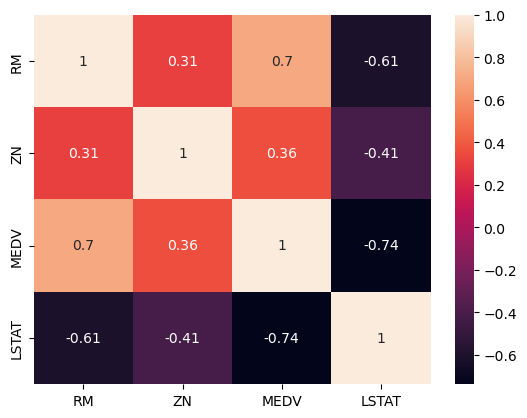

In [7]:
heat_map = sns.heatmap(corr_matrix, 
                      annot=True, 
                      xticklabels=cols,
                      yticklabels=cols)

## Scatter Plot of Coorelation

- 'RM' and 'MEDV' seem to show a linear relation

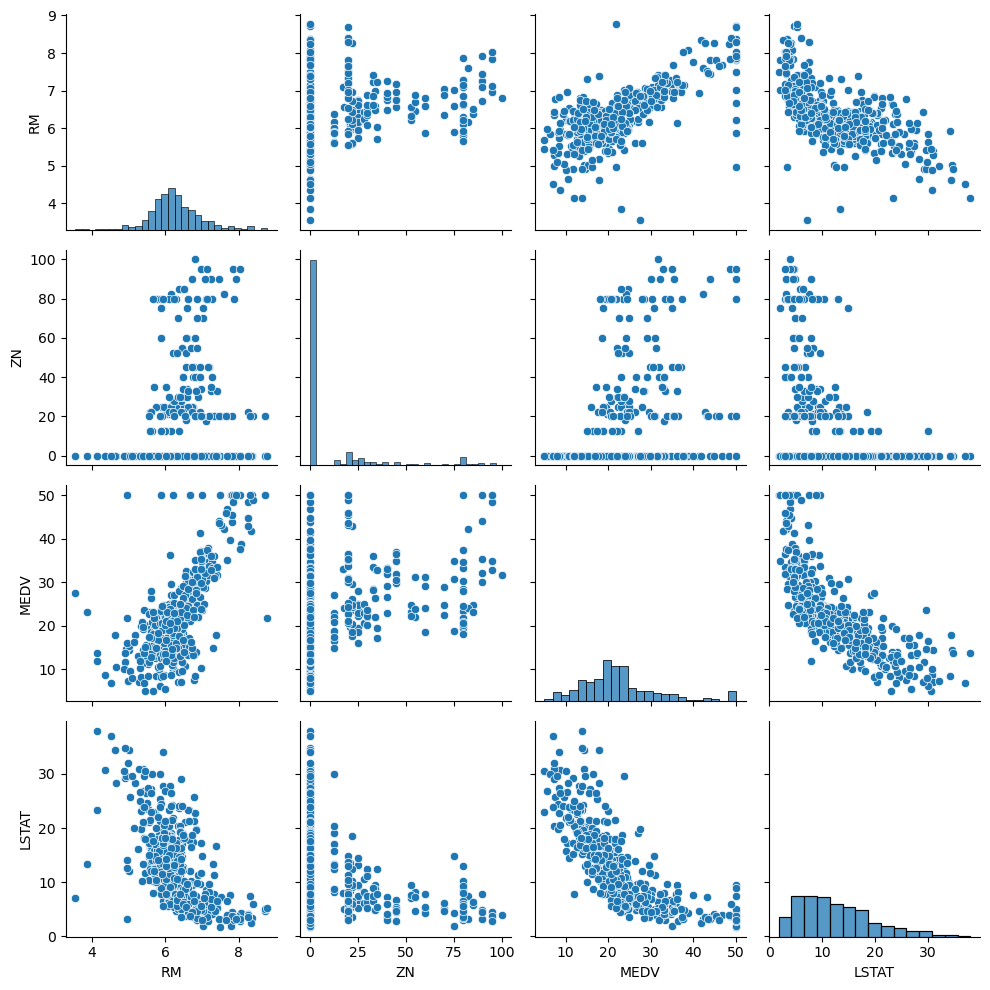

In [8]:
sns.pairplot(housing_df[cols], height=2.5)
plt.tight_layout()
plt.show()

## Preprocessing Dataset

- Split data into training and test sets
- Use 80% of the data for the training set

In [9]:
input_ = 'RM' # number of rooms in apartment
target = 'MEDV' # median value of the apartment

df = housing_df[[input_,target]]

num_train = int( np.around(df.shape[0] * 0.8) ) # 80%
train_df = df.iloc[:num_train, :]
test_df = df.iloc[num_train:, :]

# train-test split
X_train, y_train = train_df[[input_]], train_df[[target]]
X_test, y_test = test_df[[input_]], test_df[[target]]

# Part 2: Linear Regression
- ML model selection as Linear Regression
- Empirical Risk Minimization
- Predicted Class label

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

- Coefficient of fitted line at training set
- y-intercept of fitted line at training set

In [11]:
tangent = model.coef_[0]
intercept = model.intercept_

print('coefficient: {}'.format(tangent))
print('y-intercept: {}'.format(intercept))

coefficient: [9.48591814]
y-intercept: [-35.91952865]


- Visualize fitted line at training set

In [12]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

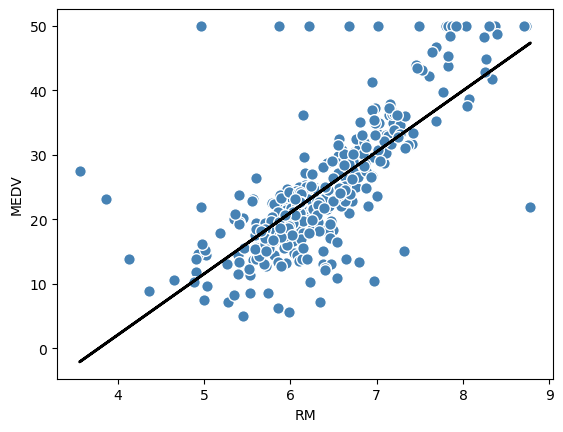

In [13]:
lin_regplot(X_train, y_train, model)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

## Calculate Performance of Linear Regression
1. Drawing Residual Plot of Linear Regression
2. Calculate performance metrics like MSE and R2

### Preprocessing for Multiple Linear Regression model
- Split train and test split for multiple features
- Use random_state=42, 80% of the data for training set
- Multiple Linear Regression Model

In [14]:
from sklearn.model_selection import train_test_split

target = 'MEDV'
X, y = housing_df.iloc[:, :-1].values, housing_df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.8,
                                                   random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

## 1. Drawing Residual Plot of Linear Regression

In [15]:
def residual_plot(X_train, X_test, y_train, y_test):
    
    delta_train = y_train_preds - y_train 
    delta_test = y_test_preds - y_test
    
    plt.scatter(y_train_preds, delta_train, 
                c='steelblue', marker='o', edgecolor='white',
                label='Training data')
    plt.scatter(y_test_preds, delta_test, 
                c='limegreen', marker='s', edgecolor='white', 
                label='Test data')
    
    plt.hlines(y=0, xmin=-10, xmax=50, 
              color='black', lw=2)
    
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.xlim([-10, 50])
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

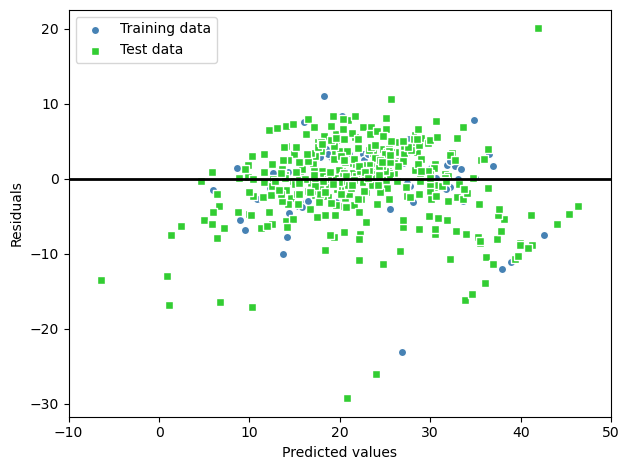

In [16]:
residual_plot(X_train, X_test, y_train, y_test)

## 2. Calculating Metrics Performance

- Mean Square Error, MSE

In [17]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train_preds, y_train)
test_error = mean_squared_error(y_test_preds, y_test)

print('Training MSE: {}'.format(train_error))
print('Test MSE: {}'.format(test_error))

Training MSE: 19.53653493678432
Test MSE: 25.56404891117345


- Coefficient of Determination, R^2

In [18]:
from sklearn.metrics import r2_score

train_error = r2_score(y_train_preds, y_train)
test_error = r2_score(y_test_preds, y_test)

print('Training R^2 score: {}'.format(train_error))
print('Test R^2 Score: {}'.format(test_error))

Training R^2 score: 0.6269508628090348
Test R^2 Score: 0.5928051028912329


# Part 3.1: Ridge Regression

- Introduce and Preprocess housing dataset with noise

In [19]:
housing_df = pd.read_csv('housing_with_noise.csv')

In [20]:
input_ = 'RM' # number of rooms in apartment
target = 'MEDV' # median value of the apartment

df = housing_df[[input_,target]]

num_train = int( np.around(df.shape[0] * 0.8) ) # 80%
train_df = df.iloc[:num_train, :]
test_df = df.iloc[num_train:, :]

# train-test split
X_train, y_train = train_df[[input_]], train_df[[target]]
X_test, y_test = test_df[[input_]], test_df[[target]]

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
def summary_ridge(X_train, X_test, y_train, y_test, alpha):
    
    # learning process
    ridge = Ridge(alpha=alpha) 
    ridge.fit(X_train, y_train)
    y_train_preds = ridge.predict(X_train)
    y_test_preds = ridge.predict(X_test)
    
    delta_train = y_train_preds - y_train 
    delta_test = y_test_preds - y_test
    
    # visualize residual loss
    plt.scatter(y_train_preds, delta_train, 
                c='steelblue', marker='o', edgecolor='white',
                label='Training data')
    plt.scatter(y_test_preds, delta_test, 
                c='limegreen', marker='s', edgecolor='white', 
                label='Test data')
    
    plt.hlines(y=0, xmin=-10, xmax=50, 
              color='black', lw=2)
    
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.xlim([-10, 50])
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # calculate model performance, MSE
    train_error = mean_squared_error(y_train_preds, y_train)
    test_error = mean_squared_error(y_test_preds, y_test)
    print('Training MSE: {}'.format(train_error))
    print('Test MSE: {}'.format(test_error))
    
    #calculate model performance, R^2
    train_error = r2_score(y_train_preds, y_train)
    test_error = r2_score(y_test_preds, y_test)
    print('Training R^2 score: {}'.format(train_error))
    print('Test R^2 Score: {}'.format(test_error))

- alpha = 0.01

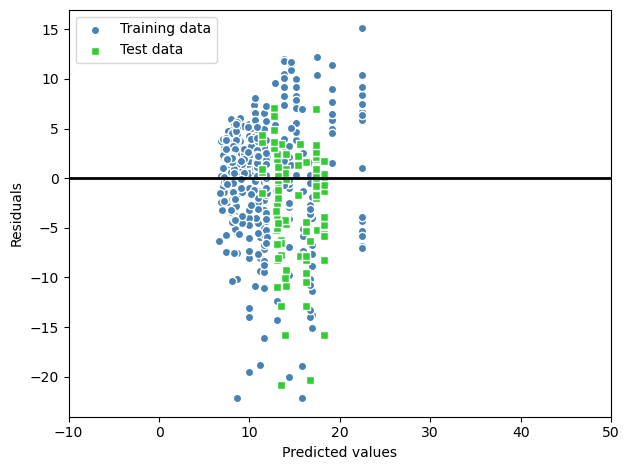

Training MSE: 32.88581255706353
Test MSE: 36.36403614774943
Training R^2 score: -1.3452001591127907
Test R^2 Score: -6.82590946247751


In [23]:
summary_ridge(X_train, X_test, y_train, y_test, alpha=0.01)

- alpha = 0.1

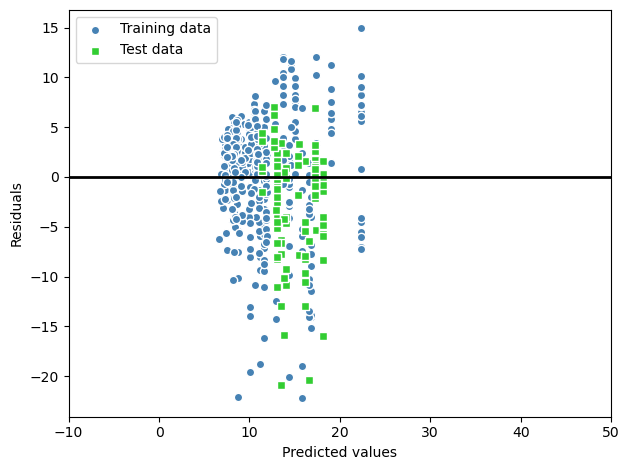

Training MSE: 32.89057355562174
Test MSE: 36.700513894805994
Training R^2 score: -1.425584931726195
Test R^2 Score: -7.167865641054485


In [24]:
summary_ridge(X_train, X_test, y_train, y_test, alpha=0.1)

- alpha = 1.0

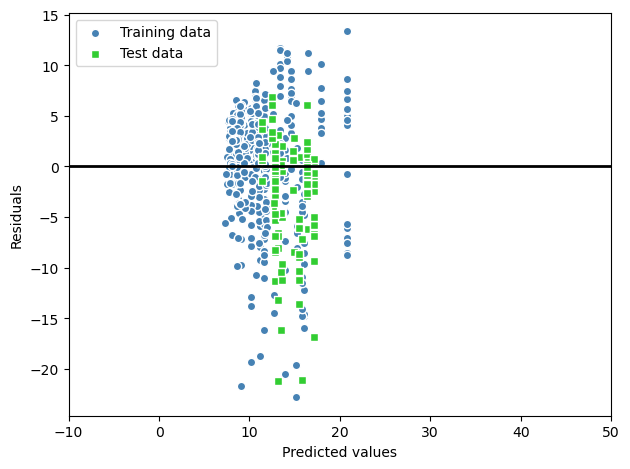

Training MSE: 33.23937551696504
Test MSE: 39.94049954515186
Training R^2 score: -2.3348984785973284
Test R^2 Score: -11.093016756362859


In [25]:
summary_ridge(X_train, X_test, y_train, y_test, alpha=1.0)

- alpha = 10

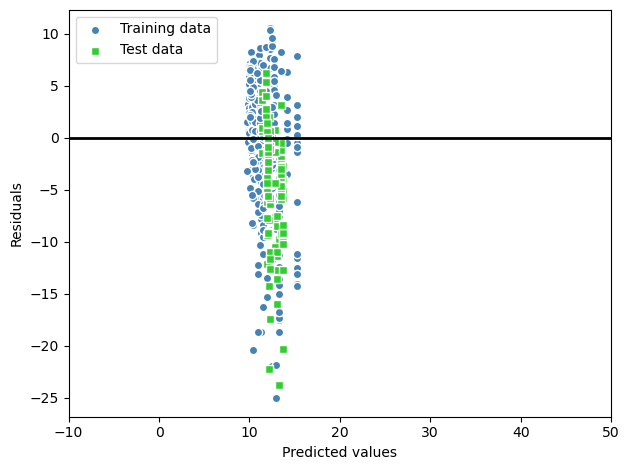

Training MSE: 38.89146296541067
Test MSE: 57.16149144267922
Training R^2 score: -21.9746160210164
Test R^2 Score: -100.90346086329804


In [26]:
summary_ridge(X_train, X_test, y_train, y_test, alpha=10)

- alpha = 50

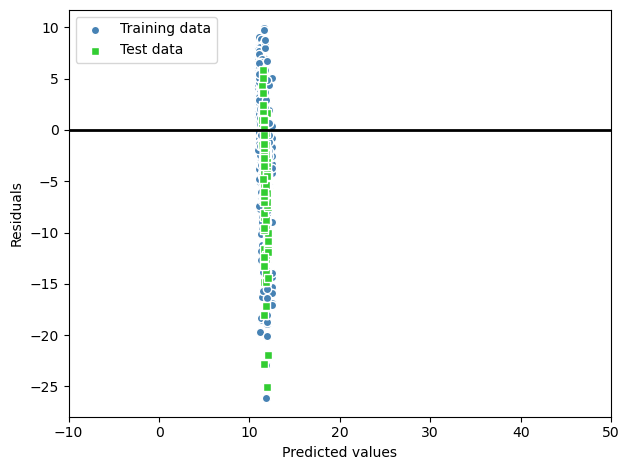

Training MSE: 44.388731341687865
Test MSE: 69.32996184832132
Training R^2 score: -341.2633815795474
Test R^2 Score: -1612.2440271471985


In [27]:
summary_ridge(X_train, X_test, y_train, y_test, alpha=50)

Therfore, ridge regression with hyperparamter alpha = 0.01 ha smaller mean squared error and higer r2 score compared to other ridge regression models. Also, randomness of residuals are inversely proportional. The bigger alpha is, the closer both training and test data is into horizontal line that predicted value is equal to 12.

# Part 3.2: LASSO Regression
- ML model selection as LASSO Regression
- Empirical Risk Minimization
- Predicted Class label

In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
def summary_lasso(X_train, X_test, y_train, y_test, alpha):
    
    # learning process
    lasso = Lasso(alpha=alpha) 
    lasso.fit(X_train.values, y_train.values)
    y_train_preds = lasso.predict(X_train.values)[:,np.newaxis]
    y_test_preds = lasso.predict(X_test.values)[:,np.newaxis]
    
    delta_train = y_train_preds - y_train.values 
    delta_test = y_test_preds - y_test.values
    
    # visualize residual loss
    plt.scatter(y_train_preds, delta_train, 
                c='steelblue', marker='o', edgecolor='white',
                label='Training data')
    plt.scatter(y_test_preds, delta_test, 
                c='limegreen', marker='s', edgecolor='white', 
                label='Test data')
    
    plt.hlines(y=0, xmin=-10, xmax=50, 
              color='black', lw=2)
    
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.xlim([-10, 50])
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # calculate model performance, MSE
    train_error = mean_squared_error(y_train_preds, y_train)
    test_error = mean_squared_error(y_test_preds, y_test)
    print('Training MSE: {}'.format(train_error))
    print('Test MSE: {}'.format(test_error))
    
    #calculate model performance, R^2
    train_error = r2_score(y_train_preds, y_train)
    test_error = r2_score(y_test_preds, y_test)
    print('Training R^2 score: {}'.format(train_error))
    print('Test R^2 Score: {}'.format(test_error))

- alpha = 0.01

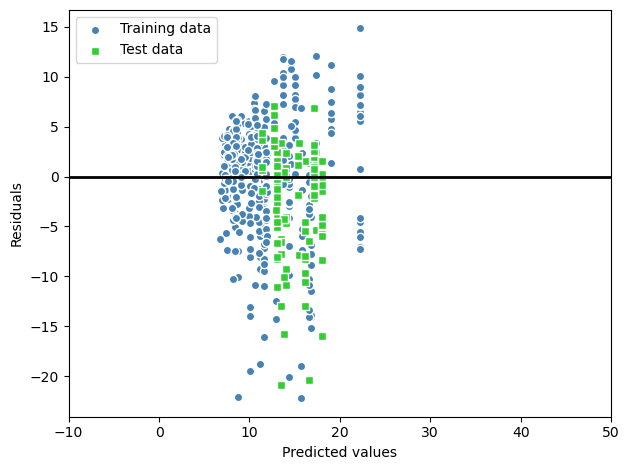

Training MSE: 32.89339121450519
Test MSE: 36.799505102462945
Training R^2 score: -1.44965791576442
Test R^2 Score: -7.270469598992161


In [38]:
summary_lasso(X_train, X_test, y_train, y_test, alpha=0.01)

- alpha = 0.1

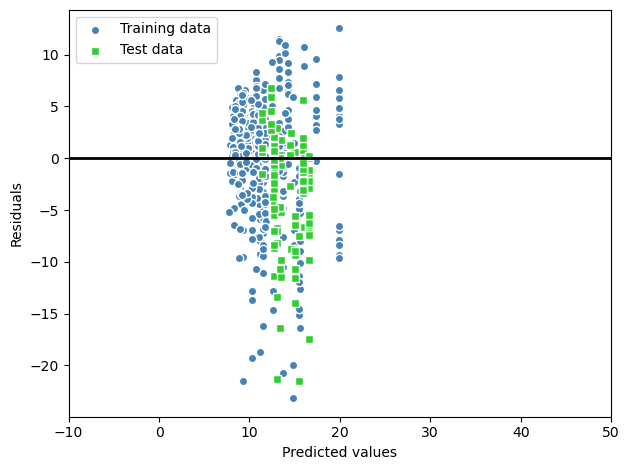

Training MSE: 33.64860347416099
Test MSE: 41.95261607194859
Training R^2 score: -3.061515634929888
Test R^2 Score: -14.2816952016998


In [42]:
summary_lasso(X_train, X_test, y_train, y_test, alpha=0.1)

- alpha = 0.3

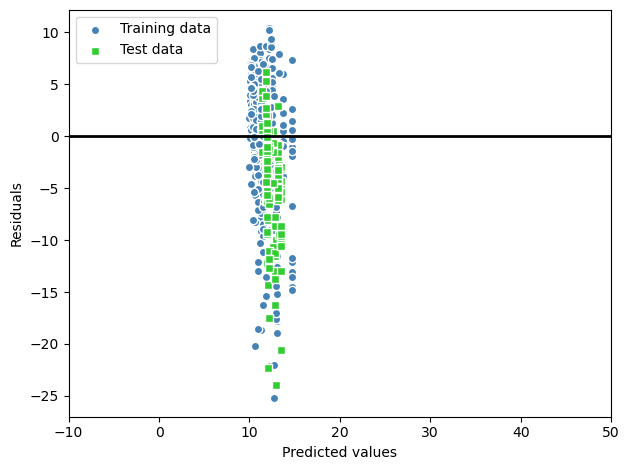

Training MSE: 39.75132880471286
Test MSE: 59.18352094481496
Training R^2 score: -30.048223561824756
Test R^2 Score: -138.5009949973099


In [43]:
summary_lasso(X_train, X_test, y_train, y_test, alpha=0.3)

- alpha = 0.4

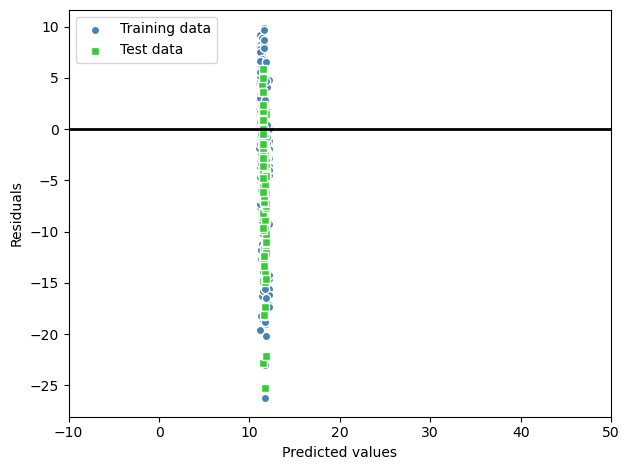

Training MSE: 45.09121346894577
Test MSE: 70.78839432757486
Training R^2 score: -675.8864744876726
Test R^2 Score: -3205.840613888699


In [48]:
summary_lasso(X_train, X_test, y_train, y_test, alpha=0.4)

Therfore, lasso regression with hyperparamter alpha = 0.01 has smaller mean squared error and higer r2 score compared to other ridge regression models. Also, Randomness of residuals are inversely proportional. The bigger alpha is, the closer both training and test data is into horizontal line that is predicted value is equal to around 12.

# Part 4: Conclusion

- Both ridge and lasso regression with hyperparamter alpha = 0.01 has smaller mean squared error and higer r2 score compared to other ridge regression models. 

- Randomness of residuals are inversely proportional. The bigger alpha is, the closer both training and test data is into horizontal line that is predicted value is equal to around 12.

- Also, there is a tendency of overfitting in accordance with growing value of alpha. To be specific, gap between training MSE and testing MSE become bigger by alpha increased. 

- These situations are happening when alpha is in interval (0, inf) for ridge regression, but, for lasso regression in interval (0, 0.5)

In [49]:
print("My name is Kibae Kim")
print("My NetID is: kibaek2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Kibae Kim
My NetID is: kibaek2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
